In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import io
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import ndimage
from sklearn import svm, metrics

from sklearn.metrics import classification_report, confusion_matrix
import imageio
import matplotlib.image as mpimage
import cv2
import glob
import h5py
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import datetime as dt
from six.moves import range

In [5]:
train_path="/content/drive/MyDrive/ML/train_EC"

In [6]:
train_labels=os.listdir(train_path)

train_labels.sort()

print(train_labels)
nb_classes= 5
global_features_train=[]
train_classes=[]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [8]:

i,j=0,0
k=0
from matplotlib.pyplot import imread
for training_name in train_labels:
    path=os.path.join(train_path,training_name,'*')
    files=glob.glob(path)
    current_label=training_name
    k=1
    for fl in files:
        image=imread(fl)
        global_feature=np.hstack([image])
        train_classes.append(current_label)
        global_features_train.append(global_feature)

        i+=1
        k+1
    print("[status] processed folder: {}".format(current_label))
    j+=1
print("[status] completed global feature extraction..")
print("[status] feature vector size {}".format(np.array(global_features_train).shape))
print("[status] training labels {}".format(np.array(train_classes).shape))

[status] processed folder: a
[status] processed folder: b
[status] processed folder: c
[status] processed folder: d
[status] processed folder: e
[status] processed folder: f
[status] processed folder: g
[status] processed folder: h
[status] processed folder: i
[status] processed folder: j
[status] completed global feature extraction..
[status] feature vector size (1184, 32, 32)
[status] training labels (1184,)


In [9]:
targetNames=np.unique(train_classes)
le=LabelEncoder()
target=le.fit_transform(train_classes)
print("[status] training labels encoded...")


[status] training labels encoded...


In [10]:
np.array(global_features_train).shape

(1184, 32, 32)

In [11]:
n_samples, nx, ny=np.array(global_features_train).shape
d2_global_features=np.array(global_features_train).reshape((n_samples, nx*ny))

In [12]:
print("[Status] feature vector normalized...")
print("[Status] target label{}".format(target))
print("[Status] target label shape {}".format(target.shape))

[Status] feature vector normalized...
[Status] target label[0 0 0 ... 9 9 9]
[Status] target label shape (1184,)


In [13]:
h5f_data=h5py.File('/content/drive/MyDrive/ML/train_EC/data.,h5','w')
h5f_data.create_dataset('dataset_1',data=np.array(d2_global_features))
h5f_label=h5py.File('/content/drive/MyDrive/ML/train_EC/labels.,h5','w')
h5f_label.create_dataset('dataset_1',data=np.array(target))

<HDF5 dataset "dataset_1": shape (1184,), type "<i8">

In [14]:
h5f_data.close()
h5f_label.close()

In [16]:
h5f_data=h5py.File('/content/drive/MyDrive/ML/train_EC/data.,h5','r')
h5f_label=h5py.File('/content/drive/MyDrive/ML/train_EC/labels.,h5','r')


In [17]:
global_features_string_train= h5f_data['dataset_1']
global_labels_string_train=h5f_label['dataset_1']
global_features_train=np.array(global_features_string_train)
global_labels_train=np.array(global_labels_string_train)

In [18]:
h5f_data.close()
h5f_label.close()

In [19]:
print("[Status] training feature shape: {}".format(global_features_train.shape))
print("[Status] labels shape: {}".format(global_labels_train.shape))

[Status] training feature shape: (1184, 1024)
[Status] labels shape: (1184,)


In [20]:
clf = svm.SVC(kernel='linear')

In [21]:
from sklearn.model_selection import KFold

In [22]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [24]:
scores = cross_val_score(clf,global_features_train,global_labels_train ,scoring='accuracy', cv=cv, n_jobs=-1)

In [25]:
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.899 (0.022)


In [27]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, global_features_train,global_labels_train ,cv=10)
conf_mat = confusion_matrix(global_labels_train, y_pred)


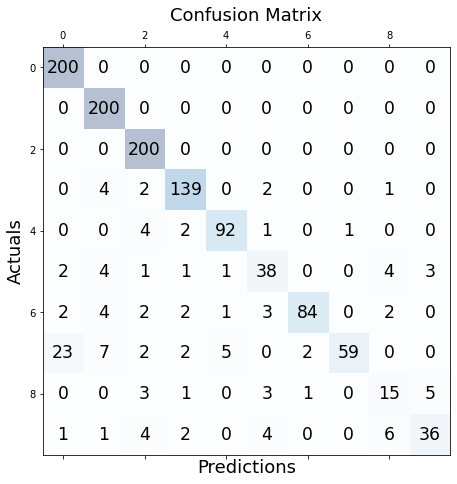

In [32]:
fig,ax=plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_mat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(conf_mat.shape[0]):

  for j in range(conf_mat.shape[1]):
    ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()


For Number of folds 2
Accuracy: 0.845 (0.002)


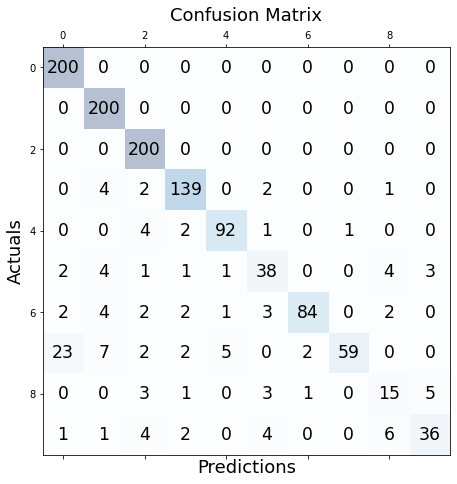

For Number of folds 3
Accuracy: 0.886 (0.008)


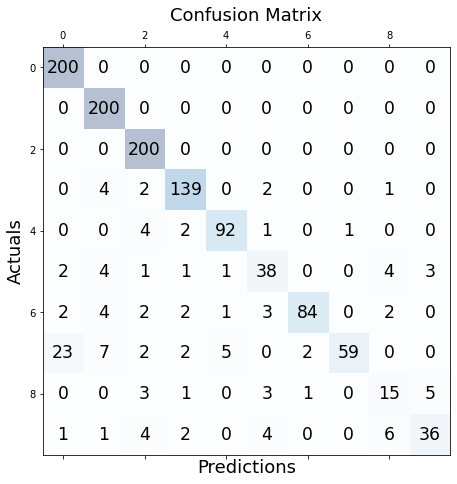

For Number of folds 4
Accuracy: 0.882 (0.020)


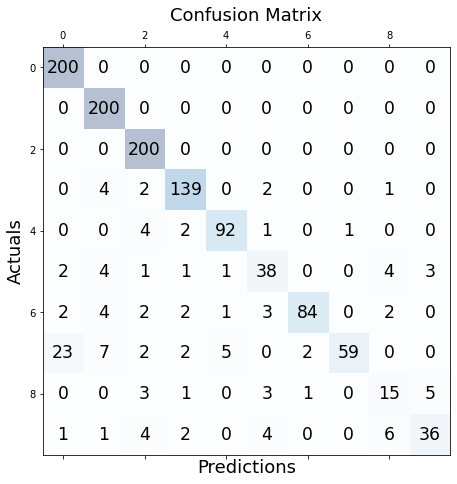

For Number of folds 5
Accuracy: 0.881 (0.027)


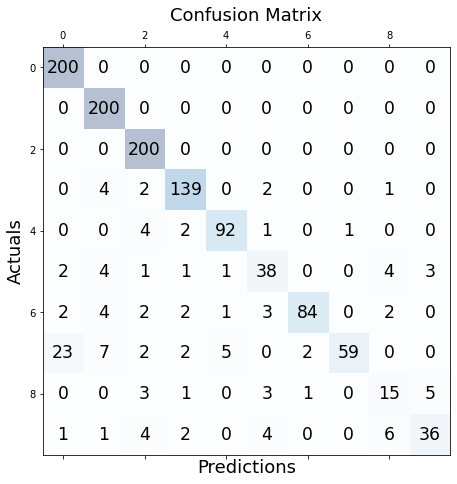

For Number of folds 6
Accuracy: 0.892 (0.033)


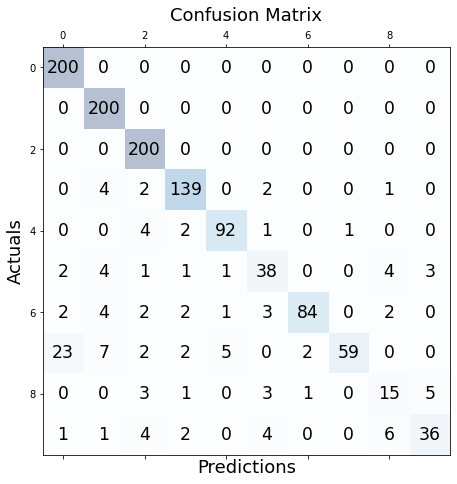

For Number of folds 7
Accuracy: 0.886 (0.026)


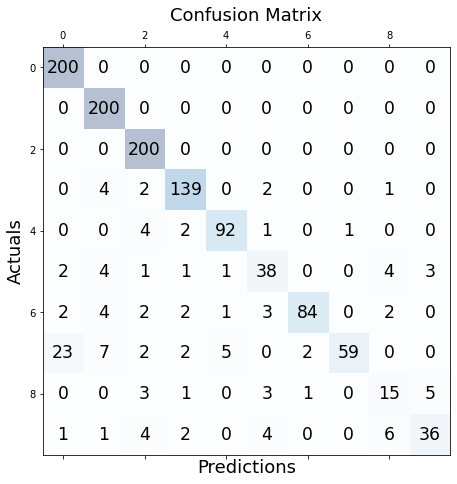

For Number of folds 8
Accuracy: 0.895 (0.021)


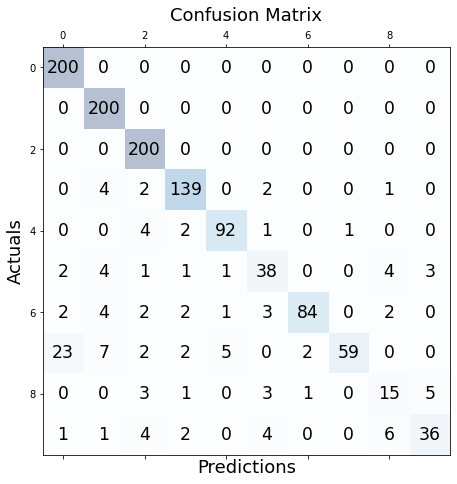

For Number of folds 9
Accuracy: 0.899 (0.019)


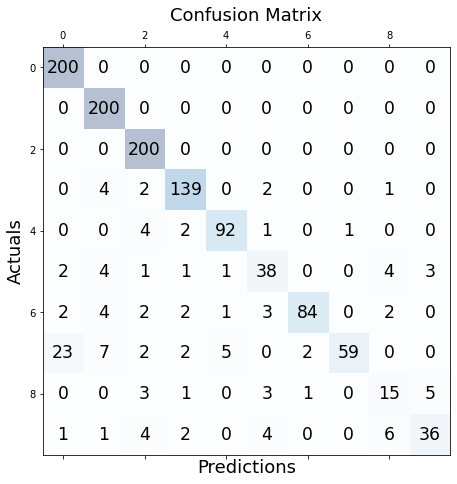

For Number of folds 10
Accuracy: 0.899 (0.022)


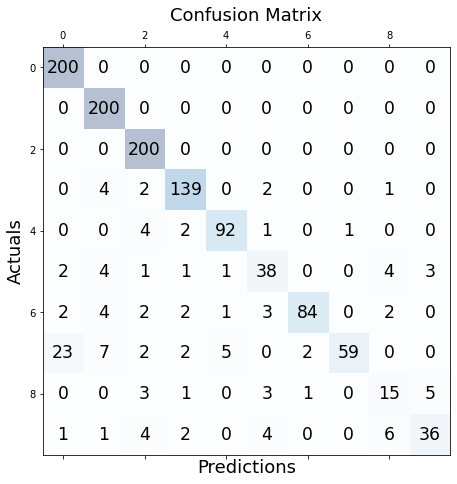

In [33]:
arr=[]
for i in range(2,11):
  print('For Number of folds',i)
  cv = KFold(n_splits=i, random_state=1, shuffle=True)
  scores = cross_val_score(clf,global_features_train,global_labels_train ,scoring='accuracy', cv=cv, n_jobs=-1)
  print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
  arr.append(mean(scores))
  y_pred = cross_val_predict(clf, global_features_train,global_labels_train ,cv=10)
  conf_mat = confusion_matrix(global_labels_train, y_pred)
  fig,ax=plt.subplots(figsize=(7.5,7.5))
  ax.matshow(conf_mat,cmap=plt.cm.Blues,alpha=0.3)
  for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
      ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center',size='xx-large')
  plt.xlabel('Predictions',fontsize=18)
  plt.ylabel('Actuals',fontsize=18)
  plt.title('Confusion Matrix',fontsize=18)
  plt.show()


In [34]:
arr
arr1=[2,3,4,5,6,7,8,9,10]

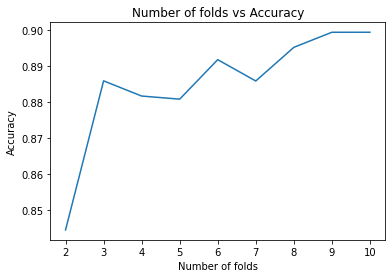

In [36]:
plt.plot(arr1,arr)
plt.xlabel('Number of folds')
plt.ylabel('Accuracy')
plt.title('Number of folds vs Accuracy')
plt.show()

In [37]:
from tabulate import tabulate
l = [["2",arr[0]],["3",arr[1]], ["4",arr[2]], ["5",arr[3]] ,["6",arr[4]],["7",arr[5]],["8",arr[6]],["9",arr[7]],["10",arr[8]]]
table = tabulate(l, headers=['Number of folds', 'Accuracy'], tablefmt='orgtbl')
print(table)

|   Number of folds |   Accuracy |
|-------------------+------------|
|                 2 |   0.844595 |
|                 3 |   0.885971 |
|                 4 |   0.881757 |
|                 5 |   0.880891 |
|                 6 |   0.891854 |
|                 7 |   0.885938 |
|                 8 |   0.89527  |
|                 9 |   0.899459 |
|                10 |   0.899466 |
